# Investors platform

Your investment will be visualized here below on a weekly basis. 


Current starting investment per person:



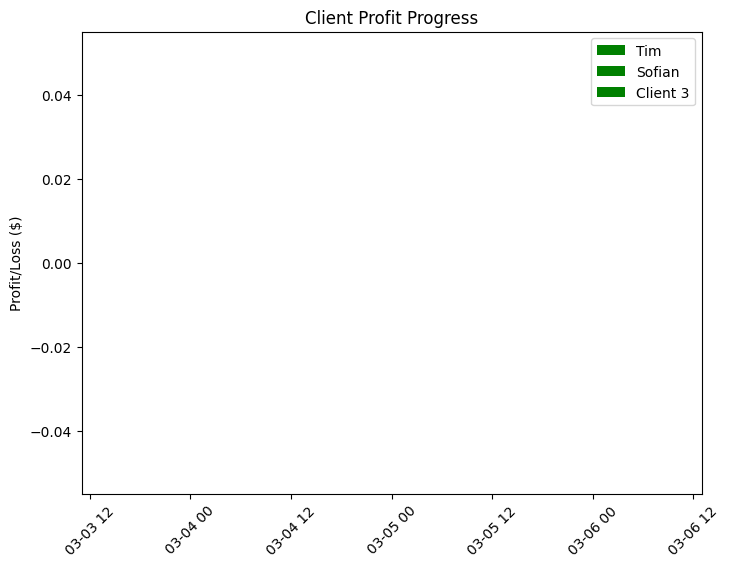

Excel file 'client_trading_tracker.xlsx' has been created successfully.


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

# Define initial data
clients = ["Tim", "Sofian", "Client 3"]  # Add more clients as needed
initial_investments = [50, 50, 0]  # Initial amounts invested

data = {
    "Client Name": clients,
    "Initial Investment ($)": initial_investments,
    "End of Day Balance ($)": [0] * len(clients),  # Placeholder for daily balances
}

df = pd.DataFrame(data)

df["Total Start Trading Account Size"] = df["Initial Investment ($)"].sum()

# Calculate proportion of profits
df["Client Profit Proportion"] = df["Initial Investment ($)"] / df["Total Start Trading Account Size"]

# Create a DataFrame to track daily balances
dates = [datetime.date(2025, 3, 4), datetime.date(2025, 3, 5), datetime.date(2025, 3, 6)]  # Example days
progress_data = {"Client Name": clients}
for date in dates:
    progress_data[date] = [0] * len(clients)  # Placeholder for daily progress

df_progress = pd.DataFrame(progress_data)

# Save the data to an Excel file
file_path = "client_trading_tracker.xlsx"
with pd.ExcelWriter(file_path) as writer:
    df.to_excel(writer, sheet_name="Client Summary", index=False)
    df_progress.to_excel(writer, sheet_name="Daily Progress", index=False)

# Visualization of profit progress
fig, ax = plt.subplots(figsize=(8, 6))
for client in clients:
    client_data = df_progress[df_progress["Client Name"] == client].iloc[:, 1:].values.flatten()
    color = ['green' if profit >= 0 else 'red' for profit in client_data]
    ax.bar(dates, client_data, label=client, color=color)

ax.set_ylabel("Profit/Loss ($)")
ax.set_title("Client Profit Progress")
ax.legend()
plt.xticks(rotation=45)
plt.show()

print(f"Excel file '{file_path}' has been created successfully.")

Enter profit/loss values for Client 1:
Enter profit/loss values for Client 2:


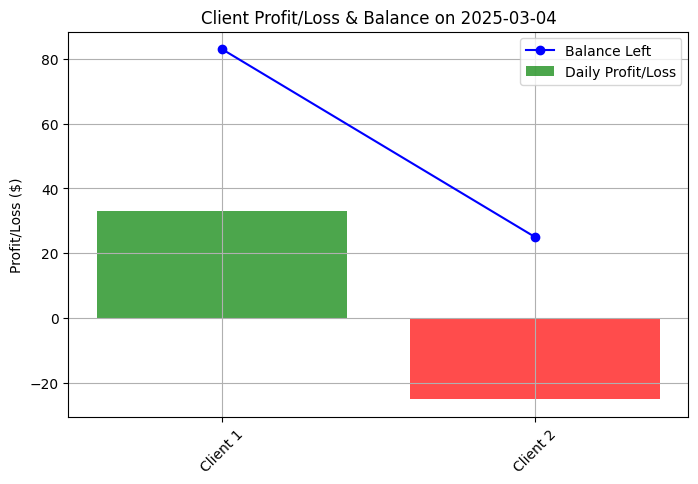

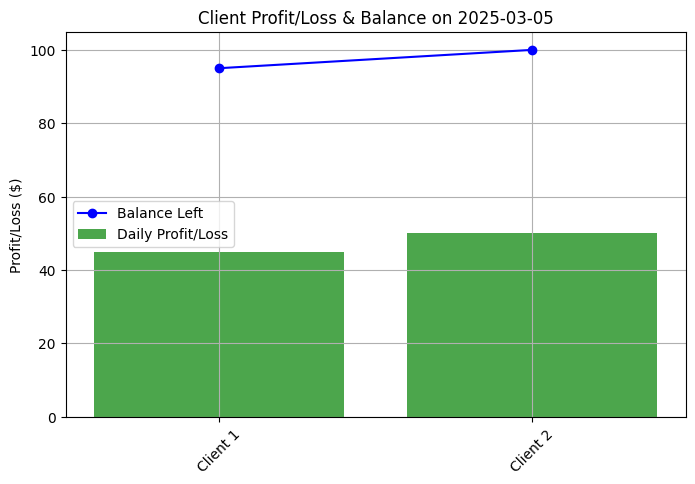

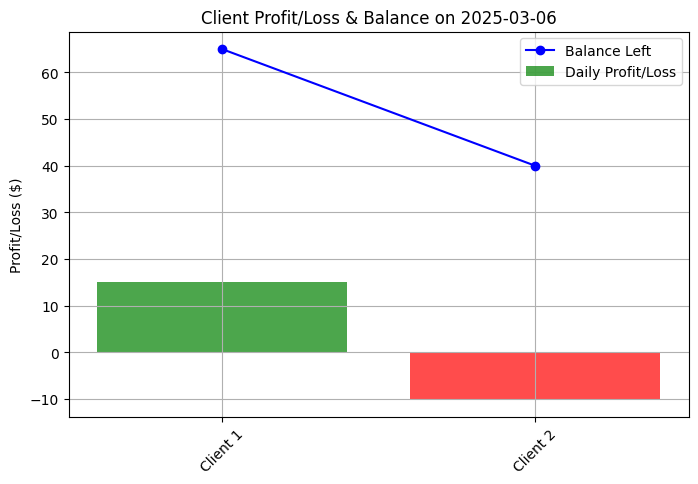

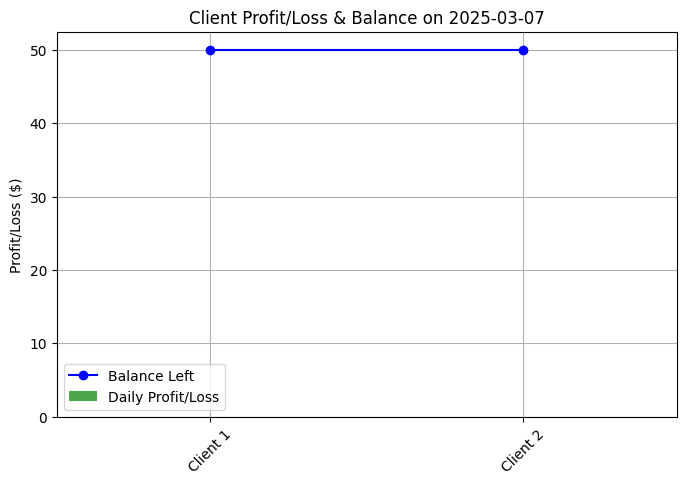

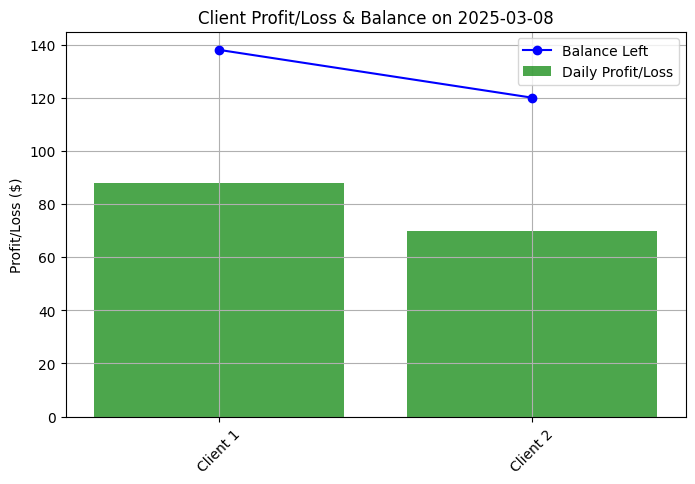

Excel file 'client_trading_tracker.xlsx' has been created successfully. You can now edit and track client profit progress for the week.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

# Define initial data
clients = ["Client 1", "Client 2"]  # Add more clients as needed
initial_investments = [50, 50]  # Initial amounts invested

data = {
    "Client Name": clients,
    "Initial Investment ($)": initial_investments,
    "End of Day Balance ($)": [0] * len(clients),  # Placeholder for daily balances
}

df = pd.DataFrame(data)

df["Total Start Trading Account Size"] = df["Initial Investment ($)"].sum()

# Calculate proportion of profits
df["Client Profit Proportion"] = df["Initial Investment ($)"] / df["Total Start Trading Account Size"]

# Define dates for the current week
dates = [datetime.date(2025, 3, 3), datetime.date(2025, 3, 4), datetime.date(2025, 3, 5),
         datetime.date(2025, 3, 6), datetime.date(2025, 3, 7)]  # Example week

# Create a DataFrame to track daily balances where users can input their profits/losses
progress_data = {"Client Name": clients}
for date in dates:
    progress_data[date] = [0] * len(clients)  # Initialize with zeroes (to be edited later)

df_progress = pd.DataFrame(progress_data)

# Allow user to manually update profit/loss values
for client in clients:
    print(f"Enter profit/loss values for {client}:")
    for date in dates:
        value = float(input(f"{date}: "))  # User input for daily profit/loss
        df_progress.loc[df_progress["Client Name"] == client, date] = value

# Save the data to an Excel file
file_path = "client_trading_tracker.xlsx"
with pd.ExcelWriter(file_path) as writer:
    df.to_excel(writer, sheet_name="Client Summary", index=False)
    df_progress.to_excel(writer, sheet_name="Daily Progress", index=False)

# Visualization of profit progress
for date in dates:
    fig, ax = plt.subplots(figsize=(8, 5))
    daily_data = df_progress[["Client Name", date]].copy()
    daily_data["Balance Left"] = df.set_index("Client Name").loc[daily_data["Client Name"], "Initial Investment ($)"].values + daily_data[date].values
    colors = ['green' if profit >= 0 else 'red' for profit in daily_data[date]]
    
    ax.bar(daily_data["Client Name"], daily_data[date], color=colors, alpha=0.7, label="Daily Profit/Loss")
    ax.plot(daily_data["Client Name"], daily_data["Balance Left"], marker='o', linestyle='-', color='blue', label="Balance Left")
    
    ax.set_ylabel("Profit/Loss ($)")
    ax.set_title(f"Client Profit/Loss & Balance on {date}")
    ax.legend()
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

print(f"Excel file '{file_path}' has been created successfully. You can now edit and track client profit progress for the week.")


In [ ]:
# last one:

Enter profit/loss values for Client 1:
Enter profit/loss values for Client 2:


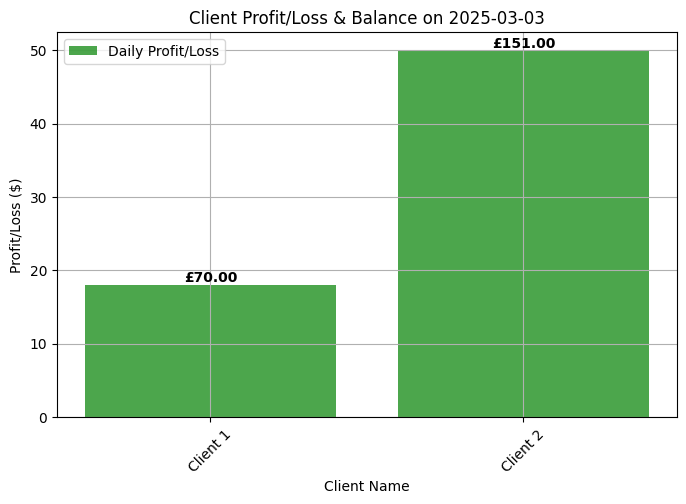

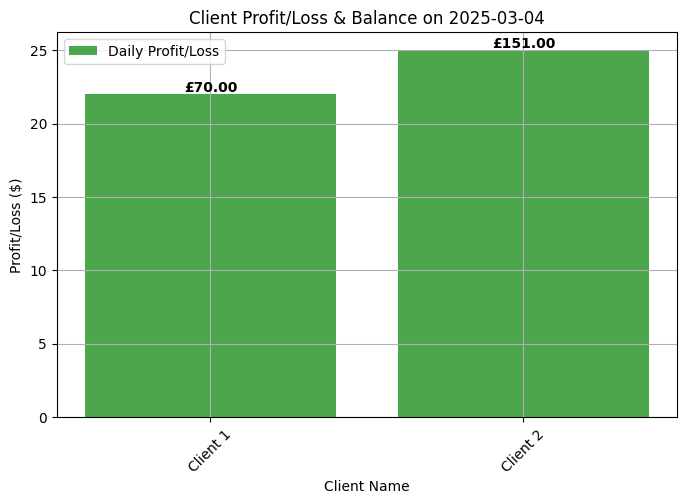

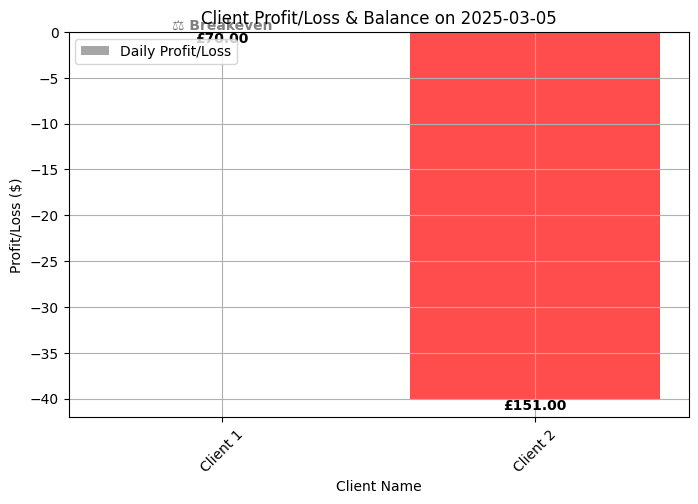

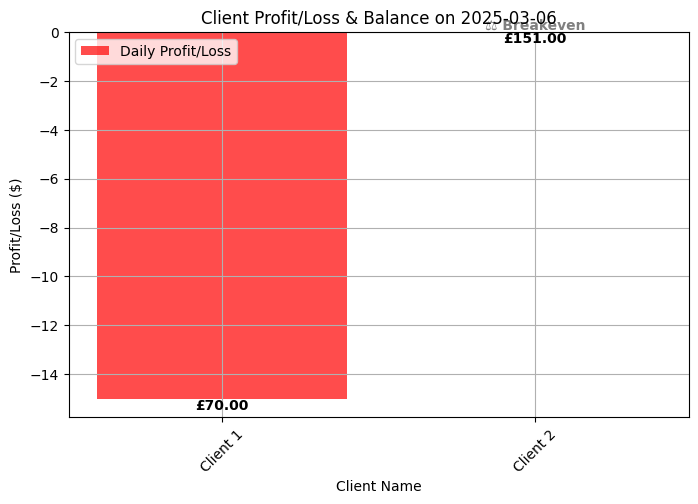

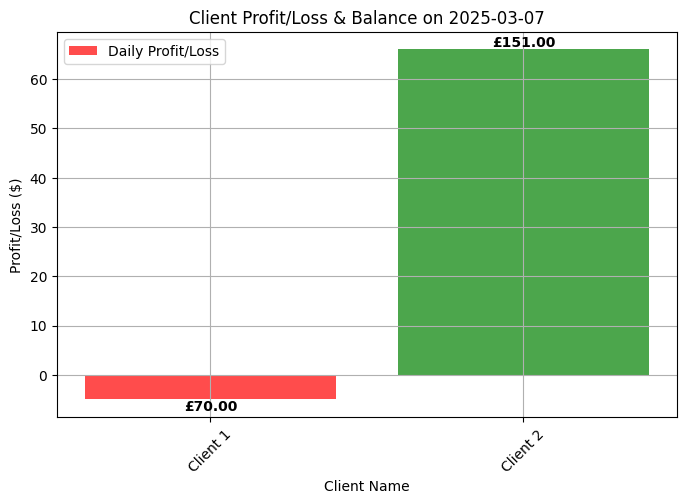

Excel file 'client_trading_tracker.xlsx' has been created successfully. You can now edit and track client profit progress for the week.


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

# Define initial data
clients = ["Client 1", "Client 2"]  # Add more clients as needed
initial_investments = [50, 50]  # Initial amounts invested

data = {
    "Client Name": clients,
    "Initial Investment ($)": initial_investments,
}

df = pd.DataFrame(data)

df["Total Start Trading Account Size"] = df["Initial Investment ($)"].sum()

# Calculate proportion of profits
df["Client Profit Proportion"] = df["Initial Investment ($)"] / df["Total Start Trading Account Size"]

# Define dates for the current week
dates = [datetime.date(2025, 3, 3), datetime.date(2025, 3, 4), datetime.date(2025, 3, 5),
         datetime.date(2025, 3, 6), datetime.date(2025, 3, 7)]  # Example week

# Create a DataFrame to track daily balances where users can input their profits/losses
progress_data = {"Client Name": clients}
for date in dates:
    progress_data[date] = [0] * len(clients)  # Initialize with zeroes (to be edited later)

df_progress = pd.DataFrame(progress_data)

# Track cumulative balance
df_progress["Cumulative Balance"] = df.set_index("Client Name")["Initial Investment ($)"].values

# Allow user to manually update profit/loss values
for client in clients:
    print(f"Enter profit/loss values for {client}:")
    previous_balance = df.loc[df["Client Name"] == client, "Initial Investment ($)"].values[0]
    
    for date in dates:
        while True:
            try:
                value = float(input(f"{date}: "))  # User input for daily profit/loss
                df_progress.loc[df_progress["Client Name"] == client, date] = value
                previous_balance += value
                df_progress.loc[df_progress["Client Name"] == client, "Cumulative Balance"] = previous_balance
                break
            except ValueError:
                print("Invalid input. Please enter a numeric value.")

# Save the data to an Excel file
file_path = "client_trading_tracker.xlsx"
with pd.ExcelWriter(file_path) as writer:
    df.to_excel(writer, sheet_name="Client Summary", index=False)
    df_progress.to_excel(writer, sheet_name="Daily Progress", index=False)

# Visualization of profit progress
for date in dates:
    fig, ax1 = plt.subplots(figsize=(8, 5))
    daily_data = df_progress[["Client Name", date, "Cumulative Balance"]].copy()
    colors = ['green' if profit > 0 else 'red' if profit < 0 else 'gray' for profit in daily_data[date]]
    
    # Bar chart for daily profit/loss
    bars = ax1.bar(daily_data["Client Name"], daily_data[date], color=colors, alpha=0.7, label="Daily Profit/Loss")
    ax1.set_ylabel("Profit/Loss ($)")
    ax1.set_xlabel("Client Name")
    ax1.set_title(f"Client Profit/Loss & Balance on {date}")
    ax1.legend(loc='upper left')
    ax1.grid(True)
    
    # Annotate cumulative balance on bars
    for bar, balance in zip(bars, daily_data["Cumulative Balance"]):
        ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'£{balance:.2f}', 
                 ha='center', va='bottom' if bar.get_height() > 0 else 'top', fontsize=10, fontweight='bold', color='black')
    
    # Handle zero profit/loss days
    for i, profit in enumerate(daily_data[date]):
        if profit == 0:
            ax1.text(i, 0, "⚖️ Breakeven", ha='center', va='bottom', fontsize=10, fontweight='bold', color='gray')
    
    plt.xticks(rotation=45)
    plt.show()

print(f"Excel file '{file_path}' has been created successfully. You can now edit and track client profit progress for the week.")


Enter profit/loss values for Client 1:
Enter profit/loss values for Client 2:


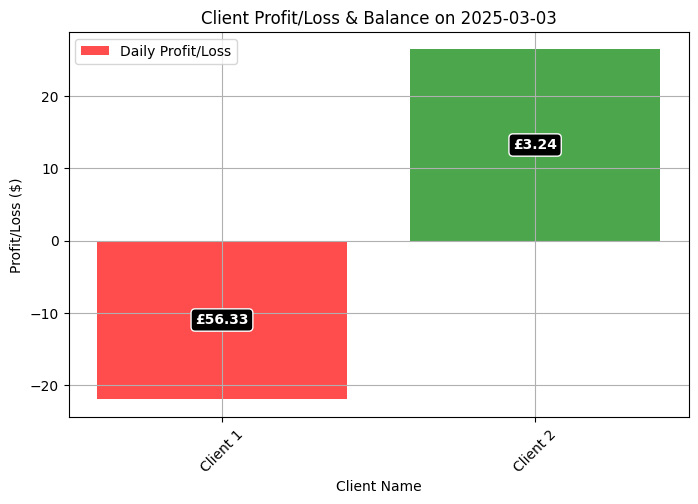

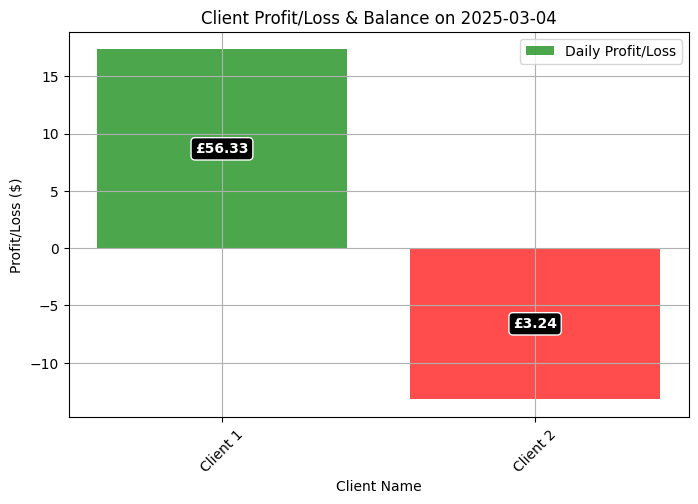

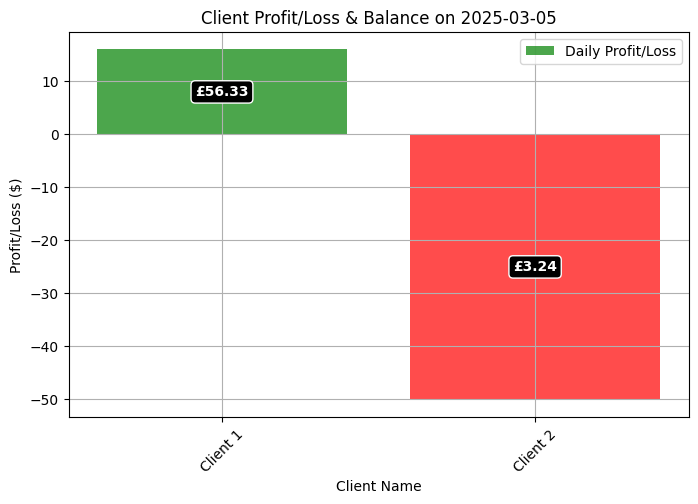

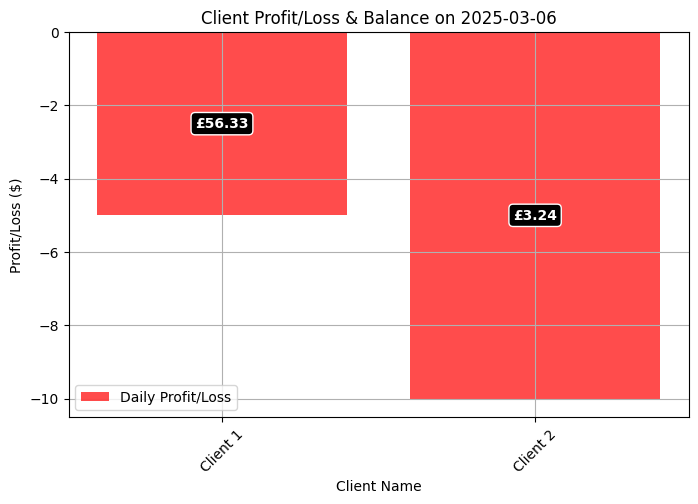

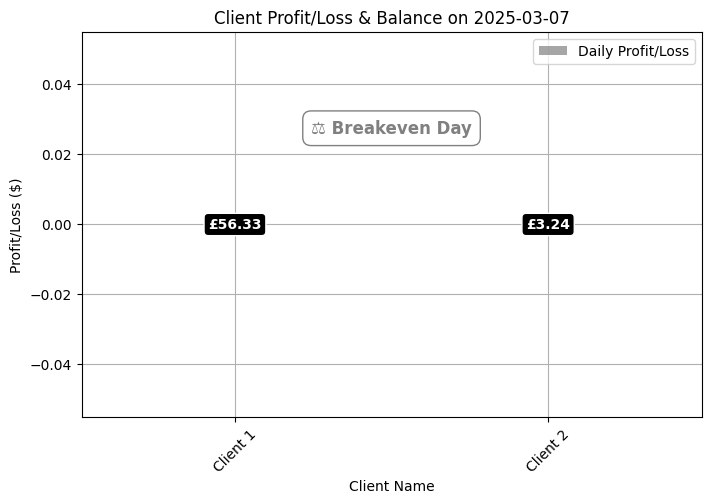

Excel file 'client_trading_tracker.xlsx' has been created successfully. You can now edit and track client profit progress for the week.


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

# Define initial data
clients = ["Client 1", "Client 2"]  # Add more clients as needed
initial_investments = [50, 50]  # Initial amounts invested

data = {
    "Client Name": clients,
    "Initial Investment ($)": initial_investments,
}

df = pd.DataFrame(data)

df["Total Start Trading Account Size"] = df["Initial Investment ($)"].sum()

# Calculate proportion of profits
df["Client Profit Proportion"] = df["Initial Investment ($)"] / df["Total Start Trading Account Size"]

# Define dates for the current week
dates = [datetime.date(2025, 3, 3), datetime.date(2025, 3, 4), datetime.date(2025, 3, 5),
         datetime.date(2025, 3, 6), datetime.date(2025, 3, 7)]  # Example week

# Create a DataFrame to track daily balances where users can input their profits/losses
progress_data = {"Client Name": clients}
for date in dates:
    progress_data[date] = [0] * len(clients)  # Initialize with zeroes (to be edited later)

df_progress = pd.DataFrame(progress_data)

# Track cumulative balance
df_progress["Cumulative Balance"] = df.set_index("Client Name")["Initial Investment ($)"].values

# Allow user to manually update profit/loss values
for client in clients:
    print(f"Enter profit/loss values for {client}:")
    previous_balance = df.loc[df["Client Name"] == client, "Initial Investment ($)"].values[0]
    
    for date in dates:
        while True:
            try:
                value = float(input(f"{date}: "))  # User input for daily profit/loss
                df_progress.loc[df_progress["Client Name"] == client, date] = value
                previous_balance += value
                df_progress.loc[df_progress["Client Name"] == client, "Cumulative Balance"] = previous_balance
                break
            except ValueError:
                print("Invalid input. Please enter a numeric value.")

# Save the data to an Excel file
file_path = "client_trading_tracker.xlsx"
with pd.ExcelWriter(file_path) as writer:
    df.to_excel(writer, sheet_name="Client Summary", index=False)
    df_progress.to_excel(writer, sheet_name="Daily Progress", index=False)

# Visualization of profit progress
for date in dates:
    fig, ax1 = plt.subplots(figsize=(8, 5))
    daily_data = df_progress[["Client Name", date, "Cumulative Balance"]].copy()
    colors = ['green' if profit > 0 else 'red' if profit < 0 else 'gray' for profit in daily_data[date]]
    
    # Bar chart for daily profit/loss
    bars = ax1.bar(daily_data["Client Name"], daily_data[date], color=colors, alpha=0.7, label="Daily Profit/Loss")
    ax1.set_ylabel("Profit/Loss ($)")
    ax1.set_xlabel("Client Name")
    ax1.set_title(f"Client Profit/Loss & Balance on {date}")
    ax1.grid(True)
    
    # Annotate cumulative balance on bars
    for bar, balance in zip(bars, daily_data["Cumulative Balance"]):
        ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height()/2, f'£{balance:.2f}', 
                 ha='center', va='center', fontsize=10, fontweight='bold', color='white', bbox=dict(facecolor='black', edgecolor='white', boxstyle='round,pad=0.3'))
    
    # Handle zero profit/loss days - Centered Annotation
    if (daily_data[date] == 0).all():  # If all values are zero
        ax1.text(len(clients) / 2 - 0.5, max(ax1.get_ylim()) / 2, "⚖️ Breakeven Day", 
                 ha='center', va='center', fontsize=12, fontweight='bold', color='gray', bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.5'))
    
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()

print(f"Excel file '{file_path}' has been created successfully. You can now edit and track client profit progress for the week.")


Enter profit/loss values for Client 1:
Enter profit/loss values for Client 2:


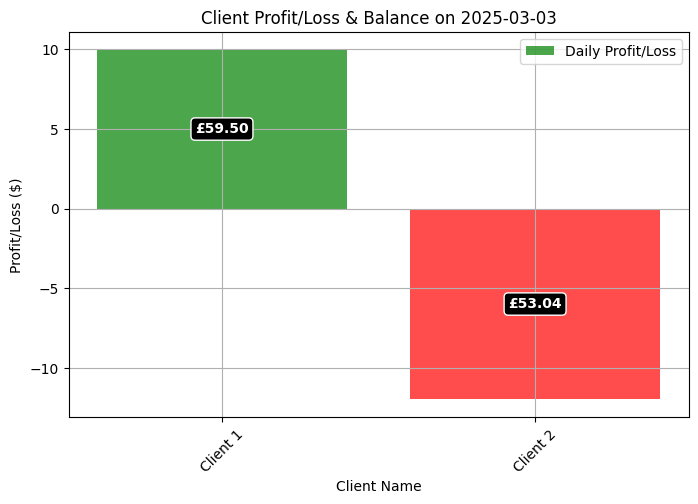

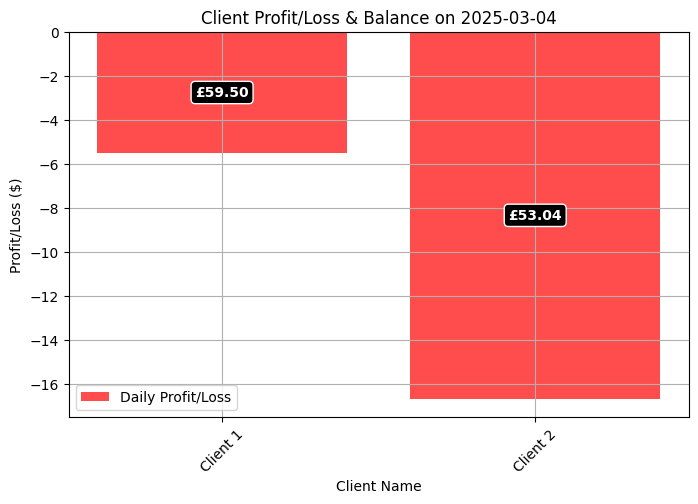

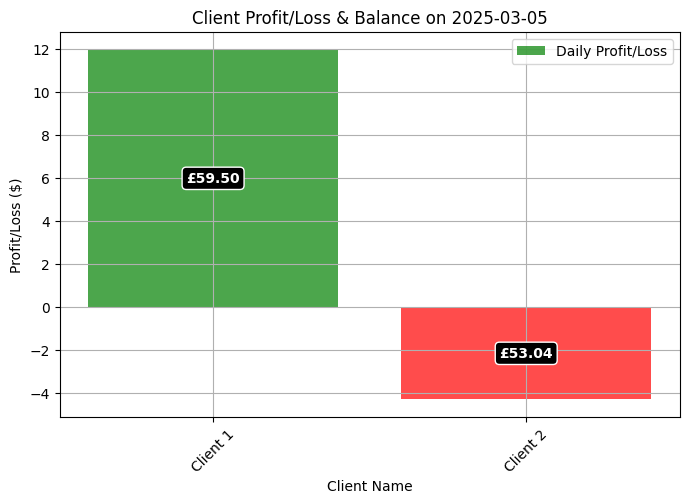

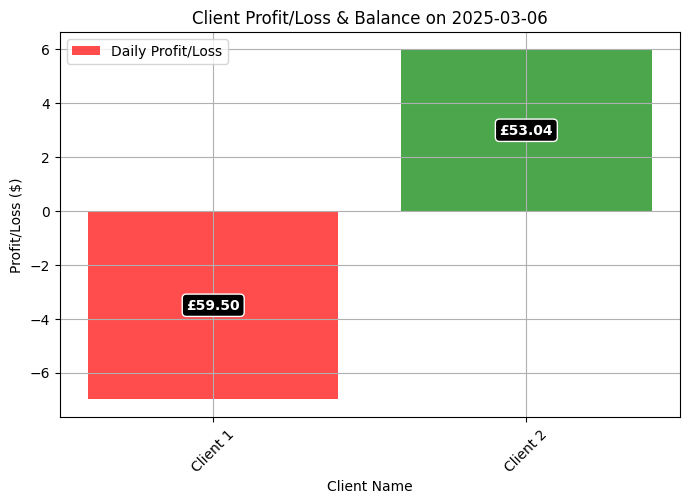

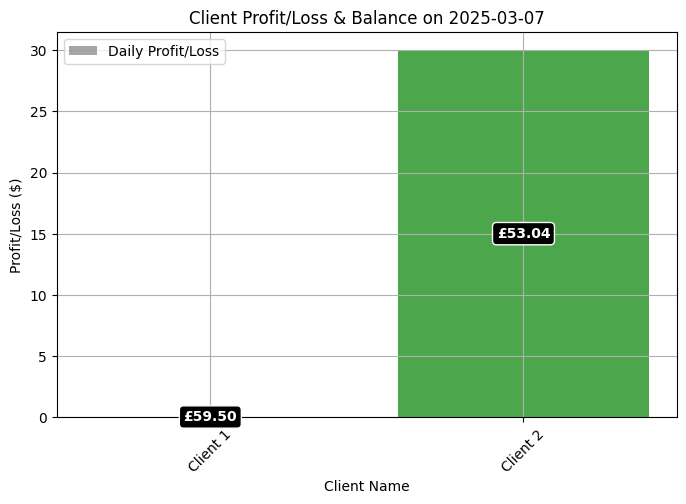

Excel file 'client_trading_tracker.xlsx' has been created successfully. You can now edit and track client profit progress for the week.


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

# Define initial data
clients = ["Client 1", "Client 2"]  # Add more clients as needed
initial_investments = [50, 50]  # Initial amounts invested

data = {
    "Client Name": clients,
    "Initial Investment ($)": initial_investments,
}

df = pd.DataFrame(data)

df["Total Start Trading Account Size"] = df["Initial Investment ($)"].sum()

# Calculate proportion of profits
df["Client Profit Proportion"] = df["Initial Investment ($)"] / df["Total Start Trading Account Size"]

# Define dates for the current week
dates = [datetime.date(2025, 3, 3), datetime.date(2025, 3, 4), datetime.date(2025, 3, 5),
         datetime.date(2025, 3, 6), datetime.date(2025, 3, 7)]  # Example week

# Create a DataFrame to track daily balances where users can input their profits/losses
progress_data = {"Client Name": clients}
for date in dates:
    progress_data[date] = [0] * len(clients)  # Initialize with zeroes (to be edited later)

df_progress = pd.DataFrame(progress_data)

# Track cumulative balance for each client
df_progress["Cumulative Balance"] = df["Initial Investment ($)"].copy()

# Allow user to manually update profit/loss values
for client in clients:
    print(f"Enter profit/loss values for {client}:")
    for date in dates:
        while True:
            try:
                value = float(input(f"{date}: "))  # User input for daily profit/loss
                df_progress.loc[df_progress["Client Name"] == client, date] = value
                df_progress.loc[df_progress["Client Name"] == client, "Cumulative Balance"] += value
                break
            except ValueError:
                print("Invalid input. Please enter a numeric value.")

# Save the data to an Excel file
file_path = "client_trading_tracker.xlsx"
with pd.ExcelWriter(file_path) as writer:
    df.to_excel(writer, sheet_name="Client Summary", index=False)
    df_progress.to_excel(writer, sheet_name="Daily Progress", index=False)

# Visualization of profit progress
for date in dates:
    fig, ax1 = plt.subplots(figsize=(8, 5))
    daily_data = df_progress[["Client Name", date, "Cumulative Balance"]].copy()
    colors = ['green' if profit > 0 else 'red' if profit < 0 else 'gray' for profit in daily_data[date]]
    
    # Bar chart for daily profit/loss
    bars = ax1.bar(daily_data["Client Name"], daily_data[date], color=colors, alpha=0.7, label="Daily Profit/Loss")
    ax1.set_ylabel("Profit/Loss ($)")
    ax1.set_xlabel("Client Name")
    ax1.set_title(f"Client Profit/Loss & Balance on {date}")
    ax1.grid(True)
    
    # Annotate cumulative balance on bars
    for bar, balance in zip(bars, daily_data["Cumulative Balance"]):
        ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height()/2, f'£{balance:.2f}', 
                 ha='center', va='center', fontsize=10, fontweight='bold', color='white', bbox=dict(facecolor='black', edgecolor='white', boxstyle='round,pad=0.3'))
    
    # Handle zero profit/loss days - Centered Annotation
    if (daily_data[date] == 0).all():  # If all values are zero
        ax1.text(len(clients) / 2 - 0.5, max(ax1.get_ylim()) / 2, "⚖️ Breakeven Day", 
                 ha='center', va='center', fontsize=12, fontweight='bold', color='gray', bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.5'))
    
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()

print(f"Excel file '{file_path}' has been created successfully. You can now edit and track client profit progress for the week.")

Enter profit/loss values for Client 1:
Enter profit/loss values for Client 2:


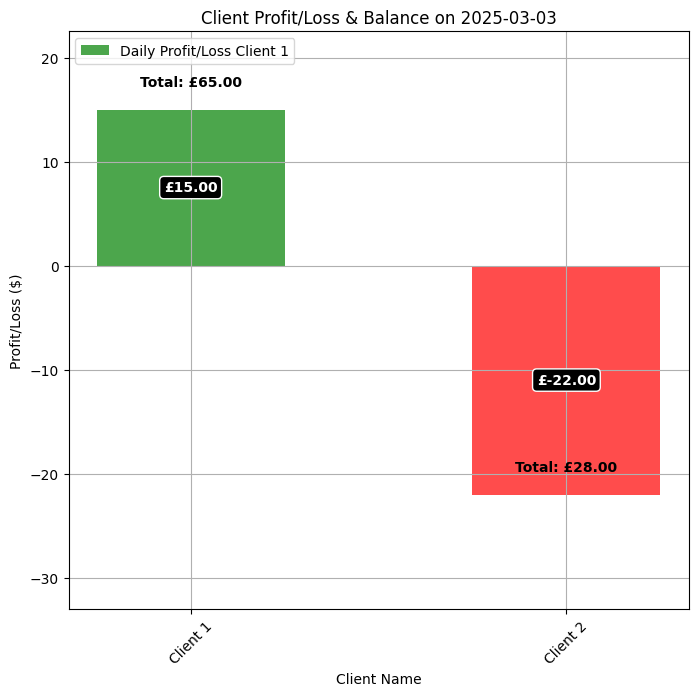

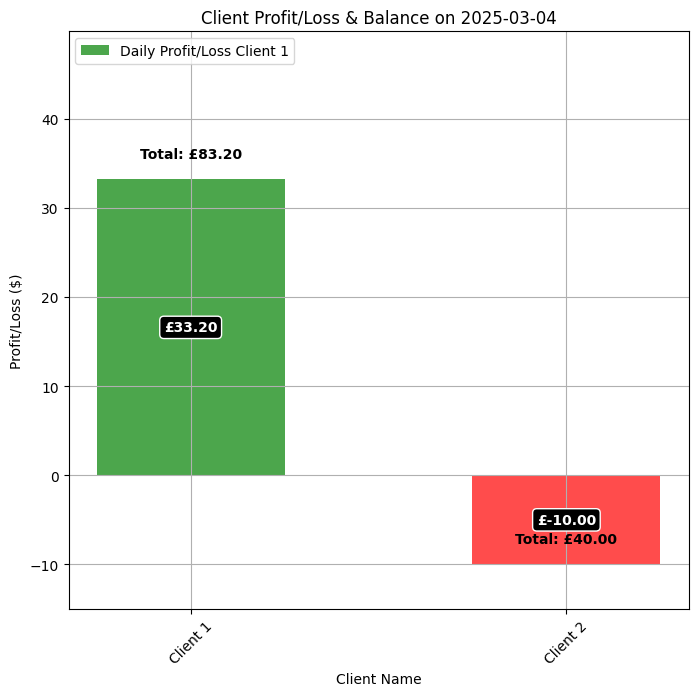

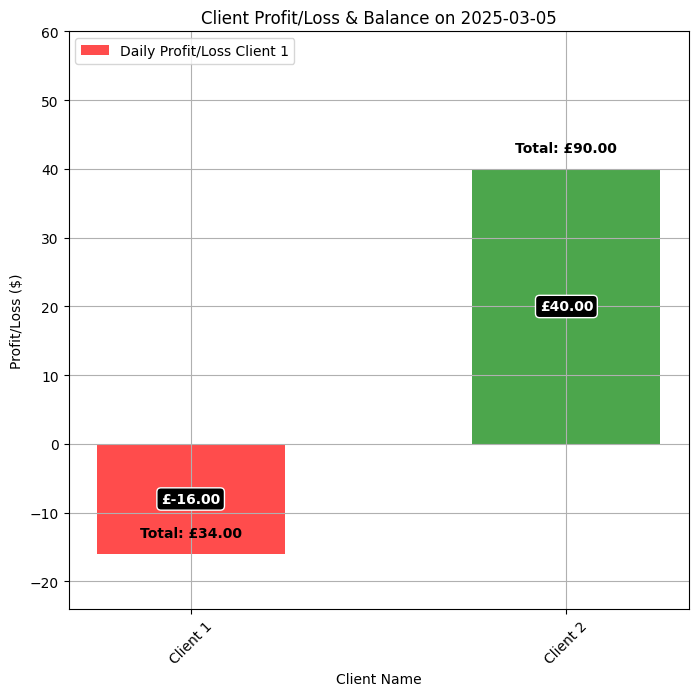

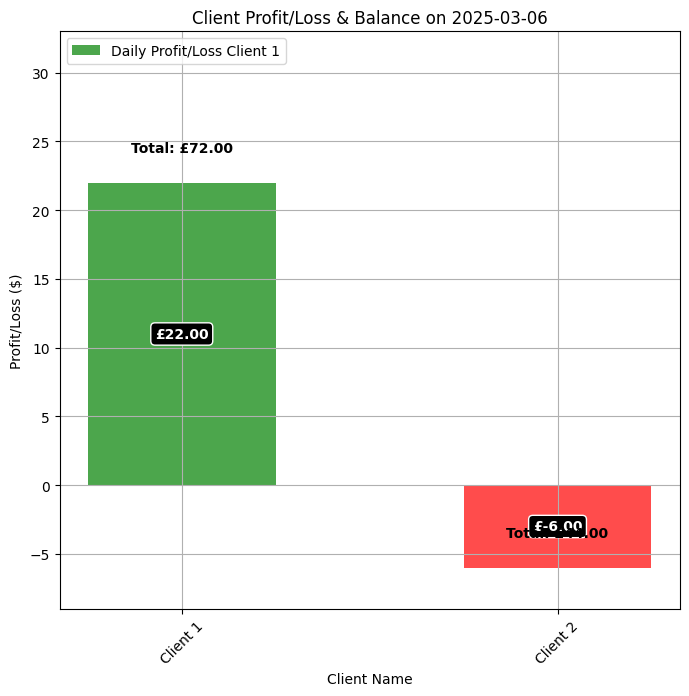

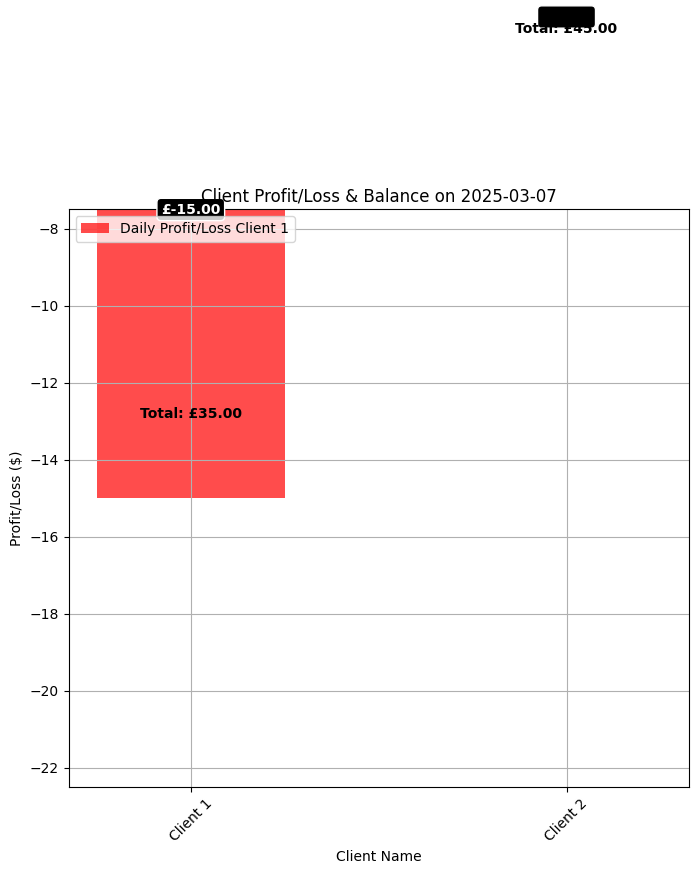

Excel file 'client_trading_tracker.xlsx' has been created successfully. You can now edit and track client profit progress for the week.


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

# Define initial data
clients = ["Client 1", "Client 2"]  # Add more clients as needed
initial_investments = [50, 50]  # Initial amounts invested

data = {
    "Client Name": clients,
    "Initial Investment ($)": initial_investments,
}

df = pd.DataFrame(data)

df["Total Start Trading Account Size"] = df["Initial Investment ($)"].sum()

# Calculate proportion of profits
df["Client Profit Proportion"] = df["Initial Investment ($)"] / df["Total Start Trading Account Size"]

# Define dates for the current week
dates = [datetime.date(2025, 3, 3), datetime.date(2025, 3, 4), datetime.date(2025, 3, 5),
         datetime.date(2025, 3, 6), datetime.date(2025, 3, 7)]  # Example week

# Create a DataFrame to track daily balances where users can input their profits/losses
progress_data = {"Client Name": clients}
for date in dates:
    progress_data[date] = [0] * len(clients)  # Initialize with zeroes (to be edited later)
    progress_data[f"Cumulative {date}"] = df["Initial Investment ($)"].copy()

df_progress = pd.DataFrame(progress_data)

# Track cumulative balance for each client
total_weekly_balance = df["Initial Investment ($)"].copy()

# Allow user to manually update profit/loss values
for client in clients:
    print(f"Enter profit/loss values for {client}:")
    for date in dates:
        while True:
            try:
                value = float(input(f"{date}: "))  # User input for daily profit/loss
                df_progress.loc[df_progress["Client Name"] == client, date] = value
                prev_cumulative = df_progress.loc[df_progress["Client Name"] == client, f"Cumulative {date}"]
                new_cumulative = prev_cumulative + value
                df_progress.loc[df_progress["Client Name"] == client, f"Cumulative {date}"] = new_cumulative
                total_weekly_balance.loc[df["Client Name"] == client] += value
                break
            except ValueError:
                print("Invalid input. Please enter a numeric value.")

# Save the data to an Excel file
file_path = "client_trading_tracker.xlsx"
with pd.ExcelWriter(file_path) as writer:
    df.to_excel(writer, sheet_name="Client Summary", index=False)
    df_progress.to_excel(writer, sheet_name="Daily Progress", index=False)

# Visualization of profit progress
for date in dates:
    fig, ax1 = plt.subplots(figsize=(8, 7.5))  # Increase height by 1.5x the max value
    daily_data = df_progress[["Client Name", date, f"Cumulative {date}"]].copy()
    colors = ['green' if profit > 0 else 'red' if profit < 0 else 'gray' for profit in daily_data[date]]
    
    # Adjust bar width to accommodate text visibility
    bar_width = 0.5
    bars = ax1.bar(daily_data["Client Name"], daily_data[date], color=colors, alpha=0.7, label="Daily Profit/Loss", width=bar_width)
    ax1.set_ylabel("Profit/Loss ($)")
    ax1.set_xlabel("Client Name")
    ax1.set_title(f"Client Profit/Loss & Balance on {date}")
    ax1.set_ylim([min(daily_data[date]) * 1.5, max(daily_data[date]) * 1.5])  # Increase height by 1.5x
    ax1.grid(True)
    
    # Annotate daily profit/loss and cumulative balance on bars
    for bar, profit, balance in zip(bars, daily_data[date], daily_data[f"Cumulative {date}"]):
        text_color = 'white' if abs(profit) > 5 else 'black'
        ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height()/2, f'£{profit:.2f}', 
                 ha='center', va='center', fontsize=10, fontweight='bold', color=text_color, bbox=dict(facecolor='black', edgecolor='white', boxstyle='round,pad=0.3'))
        ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2, f'Total: £{balance:.2f}', 
                 ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')
    
    # Handle zero profit/loss days - Centered Annotation
    if (daily_data[date] == 0).all():  # If all values are zero
        ax1.text(len(clients) / 2 - 0.5, max(ax1.get_ylim()) / 2, "⚖️ Breakeven Day", 
                 ha='center', va='center', fontsize=12, fontweight='bold', color='gray', bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.5'))
    
    # Update legend to include total balance for the week
    legend_labels = [f"Daily Profit/Loss {name}" for name in daily_data["Client Name"]]
    total_balance_labels = [f"{name} Total Balance: £{balance:.2f}" for name, balance in zip(daily_data["Client Name"], total_weekly_balance)]
    plt.legend(handles=[bars], labels=legend_labels + total_balance_labels, loc='upper left')
    
    plt.xticks(rotation=45)
    plt.show()

print(f"Excel file '{file_path}' has been created successfully. You can now edit and track client profit progress for the week.")

Enter profit/loss values for Tim:
Enter profit/loss values for Sofian:


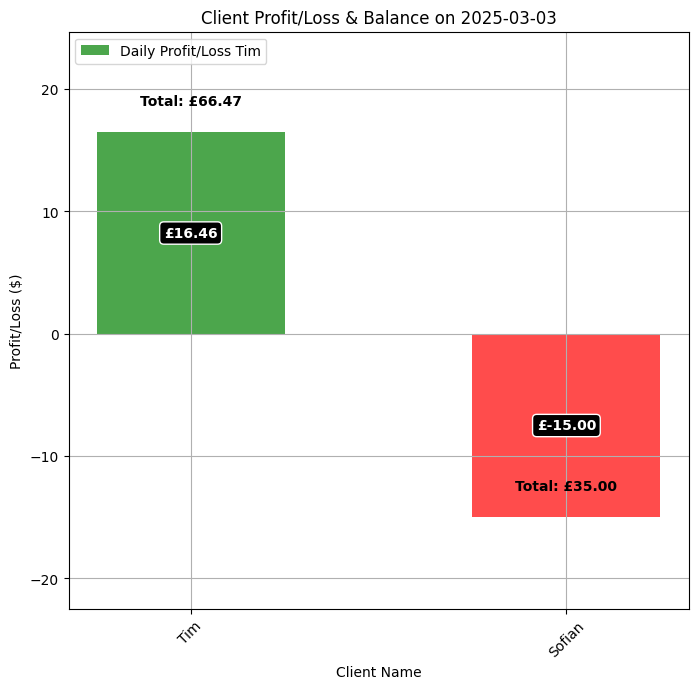

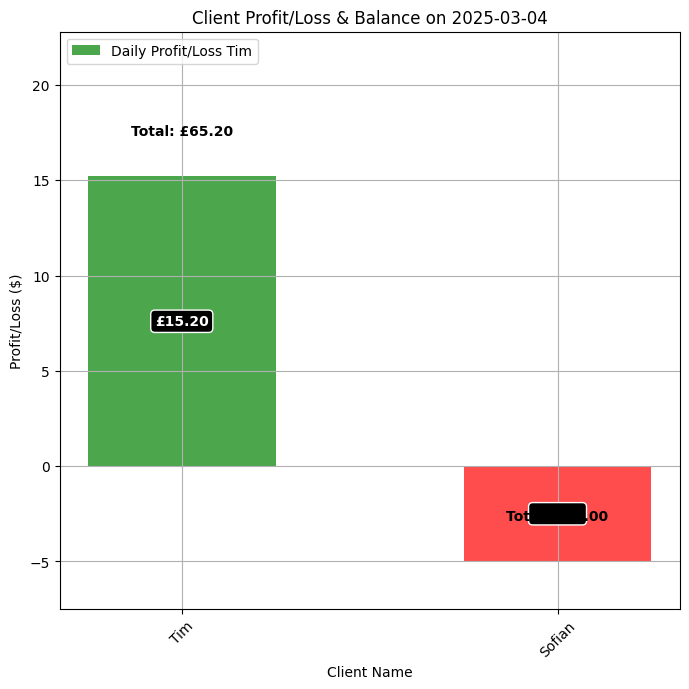

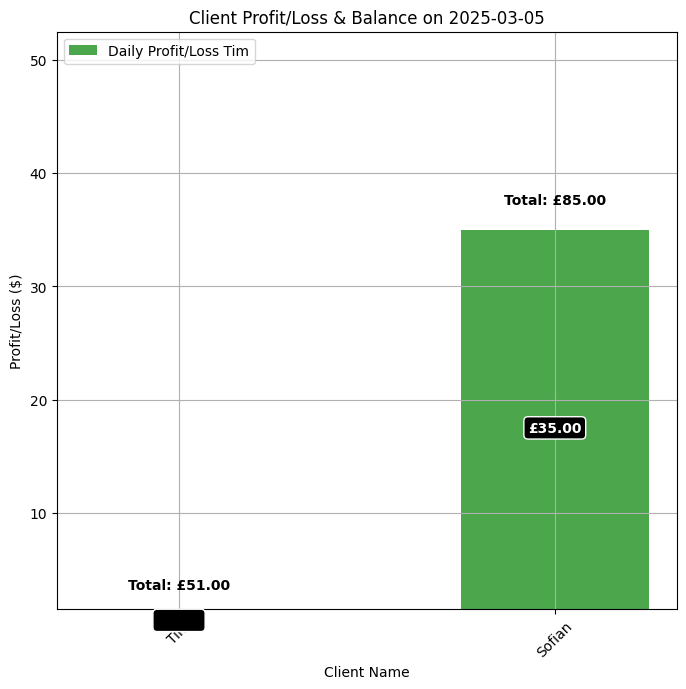

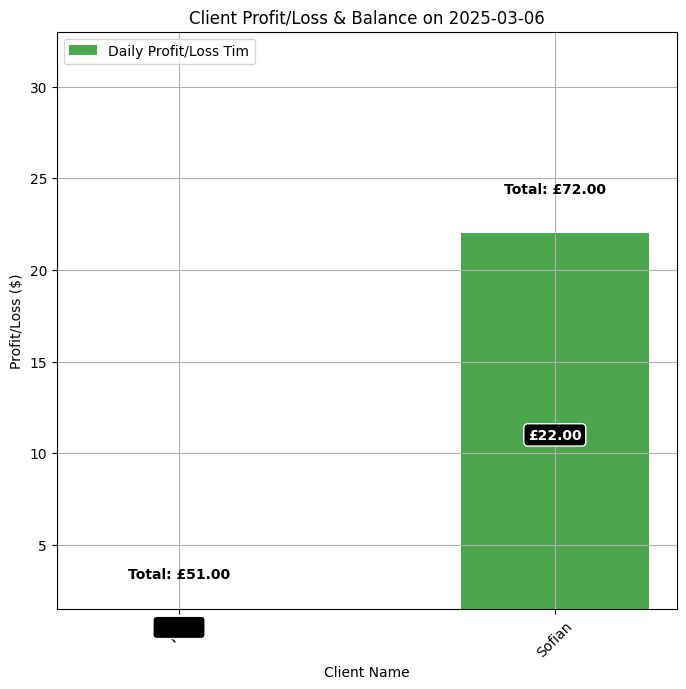

C:\Users\ahmed\AppData\Local\Temp\ipykernel_6764\2058042254.py:70: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax1.set_ylim([min(daily_data[date]) * 1.5, max(daily_data[date]) * 1.5])  # Increase height by 1.5x


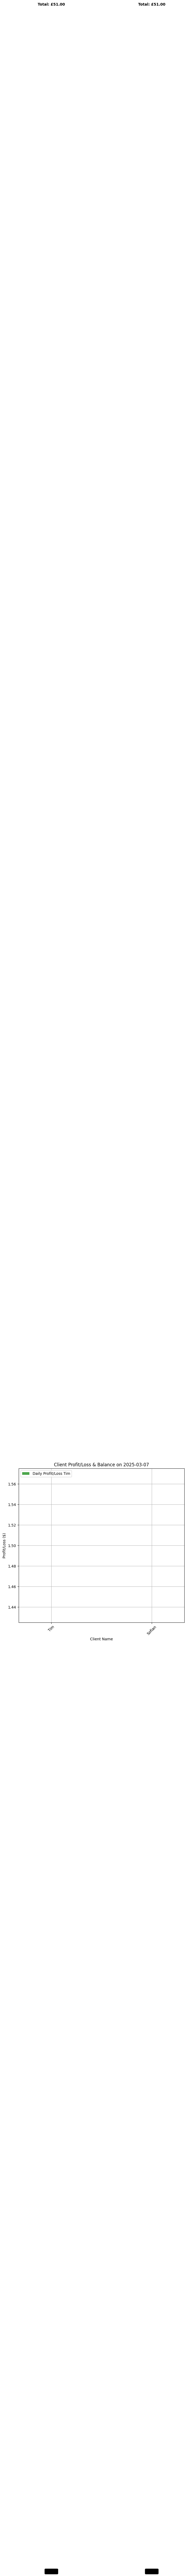


Final Client Balances:
Client Name  Final Total Balance (£)
        Tim                   84.665
     Sofian                   88.000
Excel file 'client_trading_tracker.xlsx' has been created successfully. You can now edit and track client profit progress for the week.


In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

# Define initial data
clients = ["Tim", "Sofian"]  # Add more clients as needed
initial_investments = [50, 50]  # Initial amounts invested

data = {
    "Client Name": clients,
    "Initial Investment ($)": initial_investments,
}

df = pd.DataFrame(data)

df["Total Start Trading Account Size"] = df["Initial Investment ($)"].sum()

# Calculate proportion of profits
df["Client Profit Proportion"] = df["Initial Investment ($)"] / df["Total Start Trading Account Size"]

# Define dates for the current week
dates = [datetime.date(2025, 3, 3), datetime.date(2025, 3, 4), datetime.date(2025, 3, 5),
         datetime.date(2025, 3, 6), datetime.date(2025, 3, 7)]  # Example week

# Create a DataFrame to track daily balances where users can input their profits/losses
progress_data = {"Client Name": clients}
for date in dates:
    progress_data[date] = [0] * len(clients)  # Initialize with zeroes (to be edited later)
    progress_data[f"Cumulative {date}"] = df["Initial Investment ($)"].copy()

df_progress = pd.DataFrame(progress_data)

# Track cumulative balance for each client
total_weekly_balance = df["Initial Investment ($)"].copy()

# Allow user to manually update profit/loss values
for client in clients:
    print(f"Enter profit/loss values for {client}:")
    for date in dates:
        while True:
            try:
                value = float(input(f"{date}: "))  # User input for daily profit/loss
                df_progress.loc[df_progress["Client Name"] == client, date] = value
                prev_cumulative = df_progress.loc[df_progress["Client Name"] == client, f"Cumulative {date}"]
                new_cumulative = prev_cumulative + value
                df_progress.loc[df_progress["Client Name"] == client, f"Cumulative {date}"] = new_cumulative
                total_weekly_balance.loc[df["Client Name"] == client] += value
                break
            except ValueError:
                print("Invalid input. Please enter a numeric value.")

# Save the data to an Excel file
file_path = "client_trading_tracker.xlsx"
with pd.ExcelWriter(file_path) as writer:
    df.to_excel(writer, sheet_name="Client Summary", index=False)
    df_progress.to_excel(writer, sheet_name="Daily Progress", index=False)

# Visualization of profit progress
for date in dates:
    fig, ax1 = plt.subplots(figsize=(8, 7.5))  # Increase height by 1.5x the max value
    daily_data = df_progress[["Client Name", date, f"Cumulative {date}"]].copy()
    colors = ['green' if profit > 0 else 'red' if profit < 0 else 'gray' for profit in daily_data[date]]
    
    # Adjust bar width to accommodate text visibility
    bar_width = 0.5
    bars = ax1.bar(daily_data["Client Name"], daily_data[date], color=colors, alpha=0.7, label="Daily Profit/Loss", width=bar_width)
    ax1.set_ylabel("Profit/Loss ($)")
    ax1.set_xlabel("Client Name")
    ax1.set_title(f"Client Profit/Loss & Balance on {date}")
    ax1.set_ylim([min(daily_data[date]) * 1.5, max(daily_data[date]) * 1.5])  # Increase height by 1.5x
    ax1.grid(True)
    
    # Annotate daily profit/loss and cumulative balance on bars
    for bar, profit, balance in zip(bars, daily_data[date], daily_data[f"Cumulative {date}"]):
        text_color = 'white' if abs(profit) > 5 else 'black'
        ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height()/2, f'£{profit:.2f}', 
                 ha='center', va='center', fontsize=10, fontweight='bold', color=text_color, bbox=dict(facecolor='black', edgecolor='white', boxstyle='round,pad=0.3'))
        ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2, f'Total: £{balance:.2f}', 
                 ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')
    
    # Handle zero profit/loss days - Centered Annotation
    if (daily_data[date] == 0).all():  # If all values are zero
        ax1.text(len(clients) / 2 - 0.5, max(ax1.get_ylim()) / 2, "⚖️ Breakeven Day", 
                 ha='center', va='center', fontsize=12, fontweight='bold', color='gray', bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.5'))
    
    # Update legend to include total balance for the week
    legend_labels = [f"Daily Profit/Loss {name}" for name in daily_data["Client Name"]]
    total_balance_labels = [f"{name} Total Balance: £{balance:.2f}" for name, balance in zip(daily_data["Client Name"], total_weekly_balance)]
    plt.legend(handles=[bars], labels=legend_labels + total_balance_labels, loc='upper left')
    
    plt.xticks(rotation=45)
    plt.show()

# Display final total balance table
final_balance_df = pd.DataFrame({"Client Name": clients, "Final Total Balance (£)": total_weekly_balance.values})
print("\nFinal Client Balances:")
print(final_balance_df.to_string(index=False))

print(f"Excel file '{file_path}' has been created successfully. You can now edit and track client profit progress for the week.")